# 测试
1. 正常训练结果
2. 产生梯度后发送给单独的learner(之后可以放在参数服务器上),学习之后放回参数并应用

In [1]:
from ray.rllib.algorithms.ppo import PPOConfig
import sys
sys.path.append(r"..")
from easy_helper import simplify_rllib_metrics
from ray.rllib.algorithms.ppo.torch.ppo_torch_learner import PPOTorchLearner
from ray.rllib.core import COMPONENT_RL_MODULE
import copy
import gymnasium as gym
import pandas as pd
import time

# 正常训练

2025-01-18 18:58:40,657	WARNING ppo.py:295 -- You are running PPO on the new API stack! This is the new default behavior for this algorithm. If you don't want to use the new API stack, set `config.api_stack(enable_rl_module_and_learner=False,enable_env_runner_and_connector_v2=False)`. For a detailed migration guide, see here: https://docs.ray.io/en/master/rllib/new-api-stack-migration-guide.html


d:\programs\miniconda3\Lib\site-packages\ray\rllib\algorithms\algorithm.py:569: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
`UnifiedLogger` will be removed in Ray 2.7.
  return UnifiedLogger(config, logdir, loggers=None)
d:\programs\miniconda3\Lib\site-packages\ray\tune\logger\unified.py:53: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
The `JsonLogger interface is deprecated in favor of the `ray.tune.json.JsonLoggerCallback` interface and will be removed in Ray 2.7.
  self._loggers.append(cls(self.config, self.logdir, self.trial))
d:\programs\miniconda3\Lib\site-packages\ray\tune\logger\unified.py:53: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could sup

--------- 训练迭代: 1 ---------
环境运行器:
  episode平均回报: 22.1500
  episode最大回报: 64.0000
  episode平均步数: 22.1500
  episode最大步数: 64.0000
  采样环境总步数: 4000.0000
  episodes计数: 185.0000

评估:
  无评估数据

学习者(默认策略):
  熵: 0.6645
  策略损失: -0.1389
  值函数损失: 6.5063
  总损失: 6.3725

本轮时间: 27.6693
每轮训练步数: 1
------------------------------
--------- 训练迭代: 2 ---------
环境运行器:
  episode平均回报: 39.0600
  episode最大回报: 117.0000
  episode平均步数: 39.0600
  episode最大步数: 117.0000
  采样环境总步数: 4000.0000
  episodes计数: 102.0000

评估:
  无评估数据

学习者(默认策略):
  熵: 0.6339
  策略损失: -0.0614
  值函数损失: 8.0985
  总损失: 8.0409

本轮时间: 19.2447
每轮训练步数: 1
------------------------------
--------- 训练迭代: 3 ---------
环境运行器:
  episode平均回报: 53.8800
  episode最大回报: 147.0000
  episode平均步数: 53.8900
  episode最大步数: 147.0000
  采样环境总步数: 4000.0000
  episodes计数: 65.0000

评估:
  无评估数据

学习者(默认策略):
  熵: 0.6064
  策略损失: 0.0233
  值函数损失: 8.8780
  总损失: 8.9050

本轮时间: 19.1785
每轮训练步数: 1
------------------------------
--------- 训练迭代: 4 ---------
环境运行器:
  episode平均回报: 81.3900
  episode最

<Axes: >

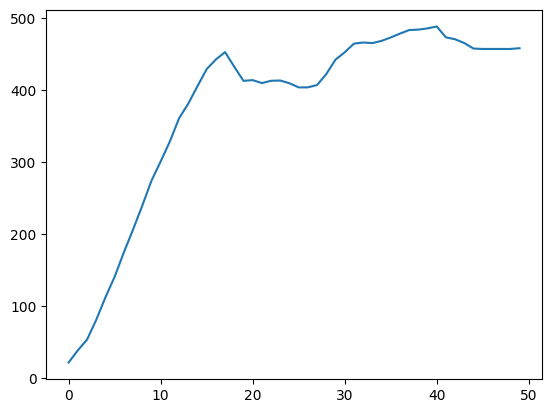

In [2]:
config = (
    PPOConfig()
    .api_stack(
        enable_rl_module_and_learner=True,
        enable_env_runner_and_connector_v2=True,
    )
    .api_stack(
        enable_rl_module_and_learner=True,
        enable_env_runner_and_connector_v2=True,
    )
    .environment("CartPole-v1")
    .env_runners(num_env_runners=0)
)

algo = config.build()
t = time.time()
mean_returns = []
for i in range(50):
    result = simplify_rllib_metrics(algo.train())
    mean_returns.append(result["环境运行器"]["episode平均回报"])

print(f"cost time: {((time.time() - t)/60):.2f}min")
pd.Series(mean_returns).plot()

# 模拟参数服务器训练

2025-01-18 19:15:14,463	WARNING rl_module.py:427 -- Could not create a Catalog object for your RLModule! If you are not using the new API stack yet, make sure to switch it off in your config: `config.api_stack(enable_rl_module_and_learner=False, enable_env_runner_and_connector_v2=False)`. Some algos already use the new stack by default. Ignore this message, if your RLModule does not use a Catalog to build its sub-components.
2025-01-18 19:15:14,534	WARNING ppo.py:295 -- You are running PPO on the new API stack! This is the new default behavior for this algorithm. If you don't want to use the new API stack, set `config.api_stack(enable_rl_module_and_learner=False,enable_env_runner_and_connector_v2=False)`. For a detailed migration guide, see here: https://docs.ray.io/en/master/rllib/new-api-stack-migration-guide.html
d:\programs\miniconda3\Lib\site-packages\ray\rllib\algorithms\algorithm.py:569: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You

--------- 训练迭代: 1 ---------
环境运行器:
  episode平均回报: 21.5400
  episode最大回报: 70.0000
  episode平均步数: 21.5400
  episode最大步数: 70.0000
  采样环境总步数: 4000.0000
  episodes计数: 184.0000

评估:
  无评估数据

学习者(默认策略):
  熵: 0.6672
  策略损失: 0.0442
  值函数损失: 6.4843
  总损失: 6.5337

本轮时间: 22.6288
每轮训练步数: 1
------------------------------
--------- 训练迭代: 2 ---------
环境运行器:
  episode平均回报: 37.4600
  episode最大回报: 109.0000
  episode平均步数: 37.4600
  episode最大步数: 109.0000
  采样环境总步数: 4000.0000
  episodes计数: 111.0000

评估:
  无评估数据

学习者(默认策略):
  熵: 0.6221
  策略损失: 0.0227
  值函数损失: 7.8457
  总损失: 7.8735

本轮时间: 21.9798
每轮训练步数: 1
------------------------------
--------- 训练迭代: 3 ---------
环境运行器:
  episode平均回报: 51.5300
  episode最大回报: 185.0000
  episode平均步数: 51.5300
  episode最大步数: 185.0000
  采样环境总步数: 4000.0000
  episodes计数: 62.0000

评估:
  无评估数据

学习者(默认策略):
  熵: 0.5957
  策略损失: -0.0901
  值函数损失: 8.8519
  总损失: 8.7659

本轮时间: 21.6922
每轮训练步数: 1
------------------------------
--------- 训练迭代: 4 ---------
环境运行器:
  episode平均回报: 81.9300
  episode最大

<Axes: >

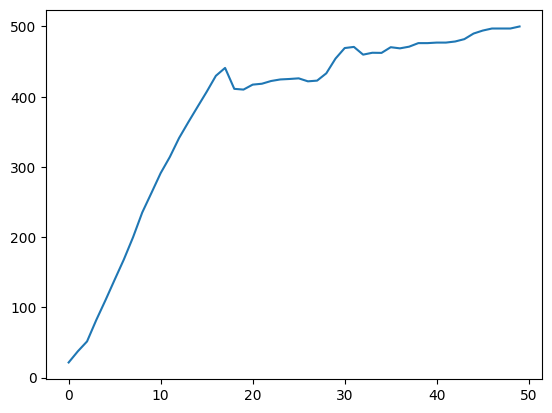

In [3]:
server = None

def get_weights(learner):
    return learner.get_state(components=COMPONENT_RL_MODULE)['rl_module']['default_policy']

def apply_gradients(gradients_dict, learner):
    """更新参数"""
    params = learner._params
    for k, v in zip(list(params.keys()), list(gradients_dict.values())):
        params[k].grad = v.to(learner._device)
    
    learner.apply_gradients({})
    return get_weights(learner)

class DebugLearner(PPOTorchLearner):

    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.server_weights = None

    def apply_gradients(self, gradients_dict) -> None:
        # 无用更新，最终参数也会被覆盖，可以优化
        # 客户端只需要计算梯度，不需要更新参数
        # super().apply_gradients(gradients_dict)

        # 2. 使用服务器参数 覆盖 本地参数
        self.set_state(self.server_weights)
    
    def compute_gradients(self, loss_per_module, **kwargs):
        gradients = super().compute_gradients(loss_per_module, **kwargs)

        # 1. 梯度传递给参数服务器, 获取服务器参数
        server_params = apply_gradients(gradients, server)
        self.server_weights = {'rl_module': {'default_policy': server_params}}

        return gradients

server_config = (
    PPOConfig()
    .api_stack(
        enable_rl_module_and_learner=True,
        enable_env_runner_and_connector_v2=True,
    )
    .api_stack(
        enable_rl_module_and_learner=True,
        enable_env_runner_and_connector_v2=True,
    )
    .env_runners(num_env_runners=0)
)

client_config = (
    PPOConfig()
    .api_stack(
        enable_rl_module_and_learner=True,
        enable_env_runner_and_connector_v2=True,
    )
    .api_stack(
        enable_rl_module_and_learner=True,
        enable_env_runner_and_connector_v2=True,
    )
    .environment("CartPole-v1")
    .env_runners(num_env_runners=0)
    .training(
        learner_class=DebugLearner,# 调试学习者
    )
)

# 初始化 参数服务器
server = server_config.build_learner(env=gym.make("CartPole-v1"))
server.build()

# 初始化 客户端
client = client_config.build()

# 同步服务器参数 > 客户端
server_init_params = get_weights(server)
server_init_params = {'default_policy': server_init_params}
client.learner_group.set_weights(server_init_params)

t = time.time()
mean_returns = []
for i in range(50):
    result = simplify_rllib_metrics(client.train())
    mean_returns.append(result["环境运行器"]["episode平均回报"])

print(f"cost time: {((time.time() - t)/60):.2f}min")
pd.Series(mean_returns).plot()